<a href="https://colab.research.google.com/github/ghanalk1/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step 1. Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dat/SeoulBikeData.csv', encoding='iso-8859-1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# checking values of all columns and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# changing Date column to datetime dataype.
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# checking for null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Checking distribution of columns.**

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df_1 = df.copy()

# **Step 2. EDA**

## **(a). Checking the count of rented bikes per hour, daily and monthly basis.**







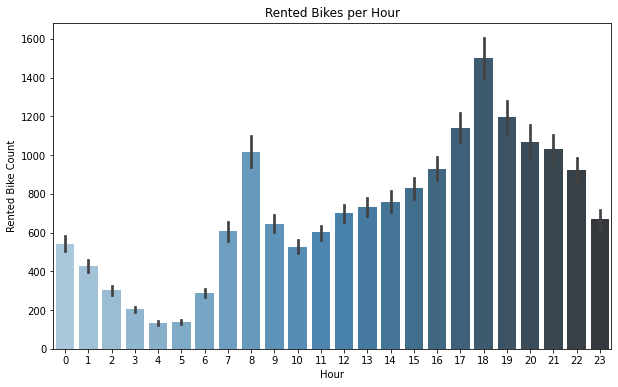

In [ ]:
# plotting count of rented bikes per hour.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes per Hour')
sns.barplot(data=df, x='Hour', y='Rented Bike Count', palette="Blues_d")

In [ ]:
# creating month and weekday columns.
df['Month'] = df['Date'].dt.month
df['Days_of_week'] = df['Date'].dt.day_name()

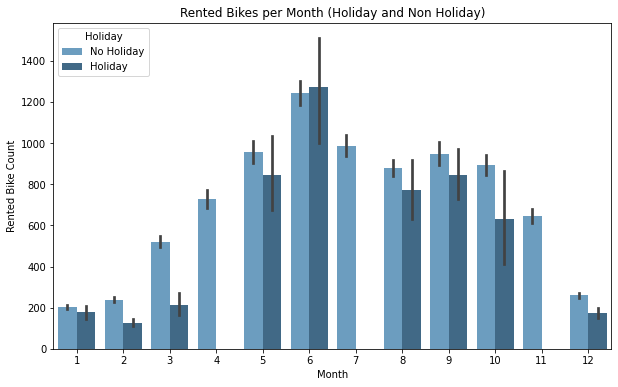

In [ ]:
# plotting rented bike count on the basis of months.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes per Month (Holiday and Non Holiday)')
sns.barplot(data=df, x='Month', y='Rented Bike Count', hue='Holiday', palette="Blues_d")

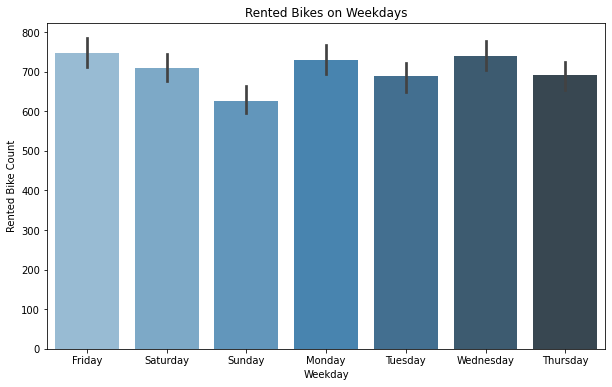

In [ ]:
# plotting rented bike count on Weekdays.
plt.figure(figsize=[10,6])
plt.title('Rented Bikes on Weekdays')
sns.barplot(data=df, x='Days_of_week', y='Rented Bike Count', palette="Blues_d")



*   **Bikes are mostly rented at 8am and between 5pm to 8pm (peaking at 6pm).**
*   **On the monthly basis, bikes are mostly rented May to November i.e. Spring to Autumn, while peaking in Summer month of June.**
*   **The demand for bikes is pretty much consistent throughout the week only dipping on Sunday.**



## **(b). Checking how is the demand for bikes affected by Weather.**



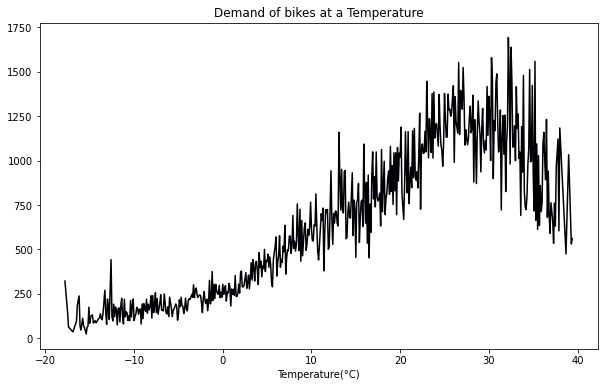

In [ ]:
# plotting the affect of temperature on demand of bikes.
df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a Temperature', colormap='inferno')

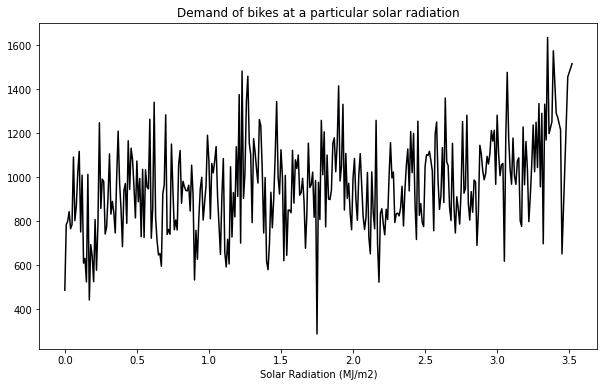

In [ ]:
# Solar Radiation vs Count of rented bikes
df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular solar radiation', colormap='inferno')

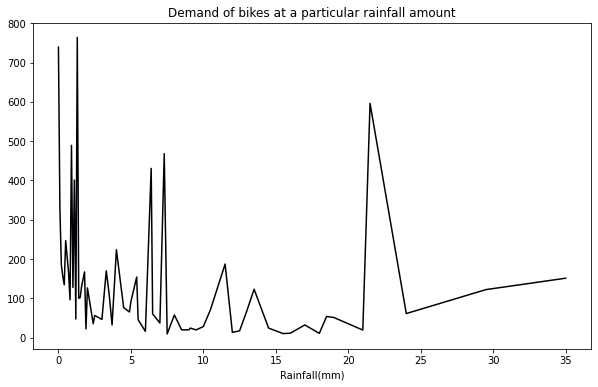

In [ ]:
# Rainfall vs Count of rented bikes
df.groupby('Rainfall(mm)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular rainfall amount',colormap='inferno')

## *The peak between 20 and 25 seems out of place, but on refering to the dataset we find it to be normal.*

In [ ]:
df[(df['Rainfall(mm)'] >=21) & (df['Rainfall(mm)'] <=24)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,Thursday
5132,2018-07-02,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,7,Monday
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,Wednesday


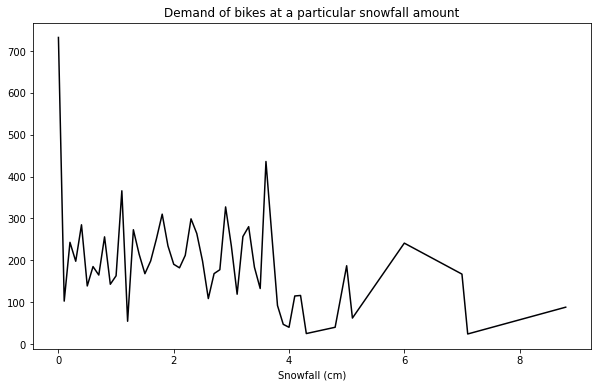

In [ ]:
# Rainfall vs Count of rented bikes
df.groupby('Snowfall (cm)')['Rented Bike Count'].mean().plot(figsize=[10,6], title='Demand of bikes at a particular snowfall amount', colormap='inferno')

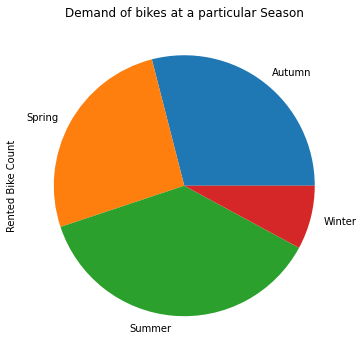

In [ ]:
# Season wise demand of bikes.
df.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', figsize=[10,6], title='Demand of bikes at a particular Season')



*   **The demand for bikes is pretty high between 25°C and 35°C. The graph for Temperature and Dew point Temperature is same.**
*   **The demand decreases when it rains or snows.**

*   **In presence of solar radiation i.e. day, the demand remains nearly constant**
*   **Most demanding season is Summer, followed by Autumn and Spring.**





## **(c). Correlation**

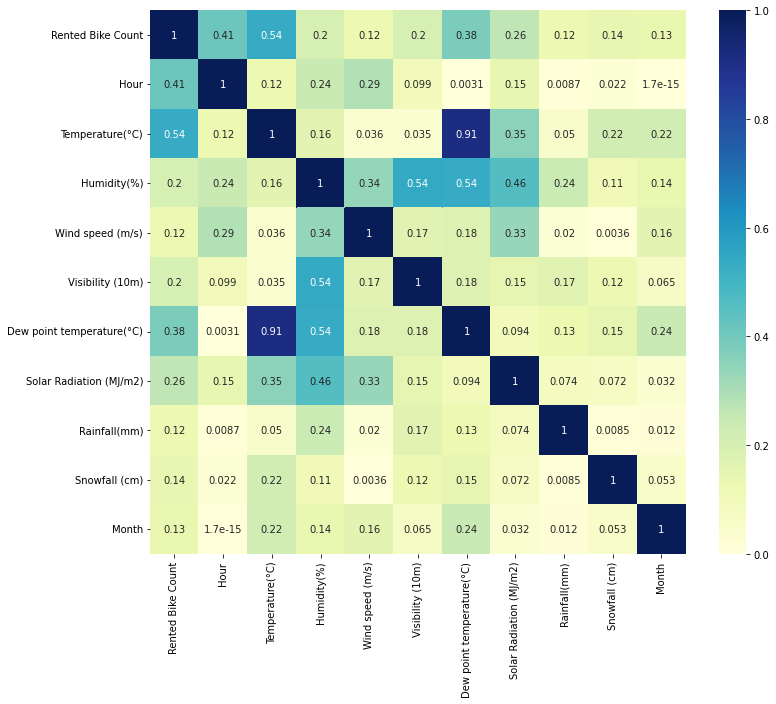

In [ ]:
# plotting heatmap
plt.figure(figsize=[12,10])
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')

* **Rental Bike Count is mostly correlated with Hour and Temperature.**
* **Temperature and Dew point Temperature are highly correlated.**

## **(d). Taking a closer look at columns.**

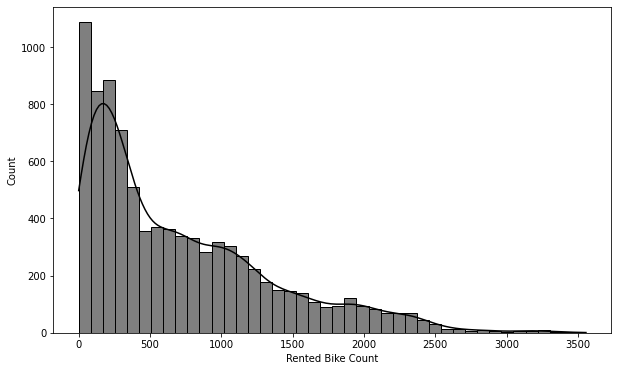

In [ ]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Rented Bike Count', kde=True, color='black')

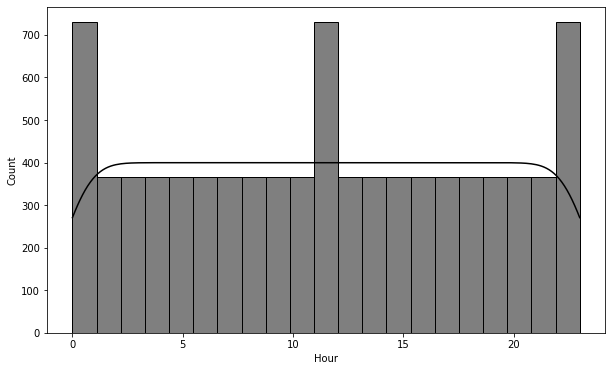

In [ ]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Hour', kde=True, color='black')

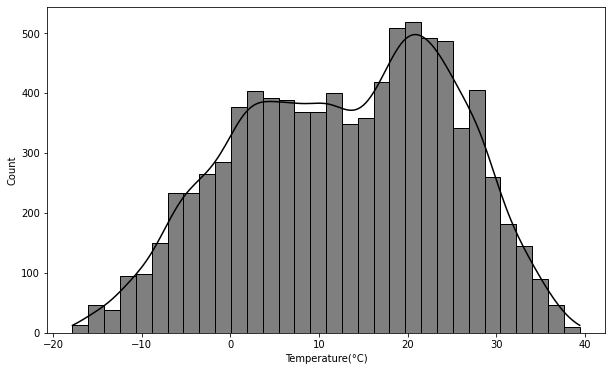

In [ ]:
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Temperature(°C)', kde=True, color='black')

## **(e). Hourly bike rented in different seasons.**

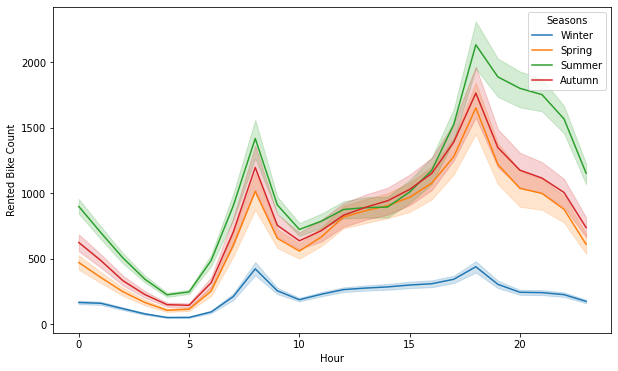

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

## In each season, the demand peaks around 8am and 6pm(highest).

## **(f). Here showing the high correlation of Temperature and Dew point Temperature**

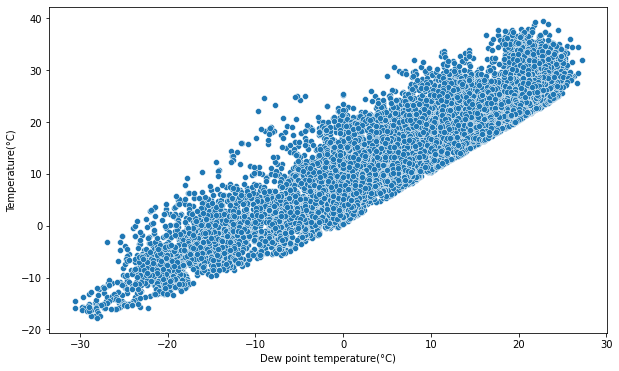

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, y='Temperature(°C)', x='Dew point temperature(°C)')

# **Step 3. Data Preparation.**

## **Adding Day, Year and Weekend column to the dataset.**

In [ ]:
df['Day'] = df['Date'].dt.day

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Weekend']=df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

## **Checking for multicollinearity**

In [ ]:
# checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
check_vif(df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


In [ ]:
# removing Dew point temp. and year to reduce vif.
check_vif(df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


In [ ]:
df.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)

## **Creating dummies**

In [ ]:
# dummification of categorical variables.
df = pd.get_dummies(df, columns = ['Seasons','Holiday','Weekend','Functioning Day'],drop_first=True)

In [ ]:
# dropping Date and weekday column because we already have information about them in other columns.
df.drop(['Weekday','Date'],axis=1,inplace=True)

In [ ]:
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,0,0,1,1,0,1


## **Seperating independent and dependent variables.**

In [ ]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

## **Splitting train and test data.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6132, 16)
(2628, 16)


# **Step 4. Decision Tree Regressor**

In [ ]:
# making function to plot important features.
def plotting_imp_features(rfr_model, training_data):
  imp_features = rfr_model.feature_importances_
  feature_names = training_data.columns
  rfr_imp_features = pd.Series(imp_features, index=feature_names)
  return rfr_imp_features.sort_values(ascending=False).plot(kind='bar',figsize=[10,6], title='Feature Importance')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

# hyper parameter tuning using gridSearchCV
parameters = {'max_depth': [int(i) for i in np.linspace(start=3, stop=20, num=17)],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              }

gridsearch_dtr = GridSearchCV(dtr, parameters, scoring='r2', cv=5)
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [ ]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}'.format(gridsearch_dtr.best_params_['max_depth'],
                                    gridsearch_dtr.best_params_['min_samples_split'], gridsearch_dtr.best_params_['min_samples_leaf']))

Best parameters for our model are: max_depth=14, min_samples_split=4, min_samples_leaf=4


In [ ]:
# train and test performance
train_score = gridsearch_dtr.best_score_
test_score = gridsearch_dtr.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.8723700754256634
The best r2 score for test data is 0.8701501450172744


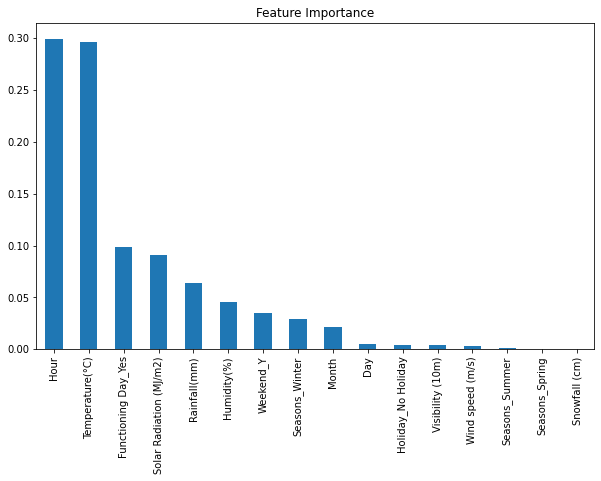

In [ ]:
plotting_imp_features(gridsearch_dtr.best_estimator_, X_train)

# **Step 5. Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# rfr model
rfr = RandomForestRegressor()

# hyper parameter tuning using gridSearchCV
parameters = {'max_depth': [50, 60, 70],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              'n_estimators':[100, 150, 200]
              }

result = GridSearchCV(rfr, parameters, scoring='r2', cv=5)
result.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}, n_estimators={}'.format(result.best_params_['max_depth'],
                                    result.best_params_['min_samples_split'], result.best_params_['min_samples_leaf'], result.best_params_['n_estimators']))
# result.best_params_

Best parameters for our model are: max_depth=60, min_samples_split=2, min_samples_leaf=1, n_estimators=150


In [ ]:
# train and test performance
train_score = result.best_score_
test_score = result.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.9243048314093721
The best r2 score for test data is 0.9229229530084382


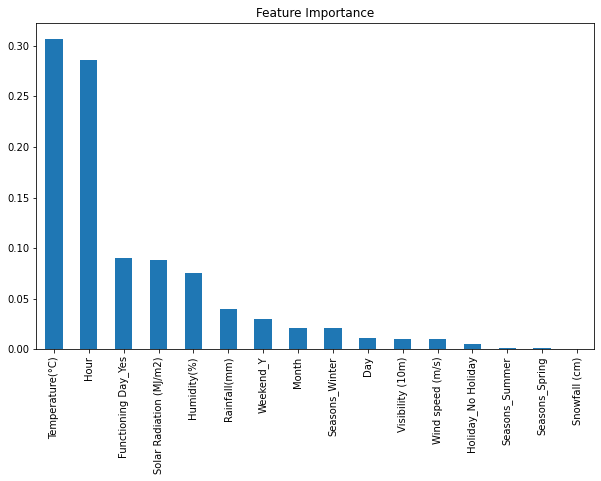

In [ ]:
plotting_imp_features(result.best_estimator_, X_train)